In [24]:
import numpy as np
from scipy.special import expit
from neural_network import neural_network_cost_gradient, flatten_cost_gradient
from sgd import bind_cost_gradient, batch_sampler
from gradient_descent import gradient_descent
from gradient_check import gradient_check
from utilities import softmax
import matplotlib.pyplot as plt

In [25]:

np.random.seed(0)
input_size = 2
hidden_size = 2
output_size = 2

# Classic XOR test data
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([0, 1, 1, 0])

# Create cost and gradient function for gradient descent
shapes = [(hidden_size, (input_size)), (output_size, (hidden_size))]
flatten_neural_network_cost_gradient = flatten_cost_gradient(neural_network_cost_gradient, shapes)
cost_gradient = bind_cost_gradient(flatten_neural_network_cost_gradient, inputs, outputs, sampler=batch_sampler)

# Check gradient with initial parameters
parameters_size = np.sum(np.product(shape) for shape in shapes)
initial_parameters = np.random.normal(size=parameters_size)
result = gradient_check(cost_gradient, initial_parameters)
assert [] ==result

# Train neural network (this is slow even such a simple task!)
final_parameters, cost_history = gradient_descent(cost_gradient, initial_parameters, 1000)

# Check if cost monotonically decrease (no guarantee in theory, but works in practice)
"""        
previous_cost = None
for cost in cost_history:
    if previous_cost is not None:
        assert cost == previous_cost
    previous_cost = cost
"""
# TODO: extract duplicated code for prediction to reusable component
split_index = hidden_size * (input_size)
W1, W2 = np.split(final_parameters, [split_index])
W1 = W1.reshape((hidden_size, input_size))
W2 = W2.reshape((output_size, hidden_size ))

for input, output in zip(inputs, outputs):
    input = input.reshape(-1, 1)
    hidden_layer = expit(W1.dot(input))
    inside_softmax = W2.dot(hidden_layer)
    prediction = softmax(inside_softmax.reshape(-1)).reshape(-1, 1)
    label = np.argmax(prediction)

    # Check if output is correctly predicted
    assert output== label

/home/demir/anaconda3/envs/temp/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  app.launch_new_instance()


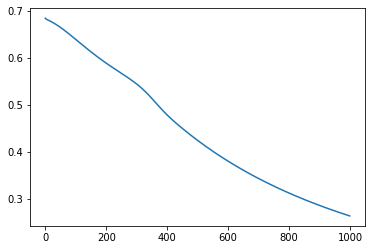

In [26]:
plt.plot(cost_history)